mean: [7.254, 10.412, 12.645714, 14.48, 16.245, 17.984, 19.484]
Sigma: [0.026, 0.0252, 0.0798, 0.0158, 0.0284, 0.0461, 0.0277]
LinregressResult(slope=0.49761966240982064, intercept=-3.002554666947569, rvalue=0.9925560963529968, pvalue=9.145798154082113e-06, stderr=0.02730631644935272, intercept_stderr=0.39939900741487816)


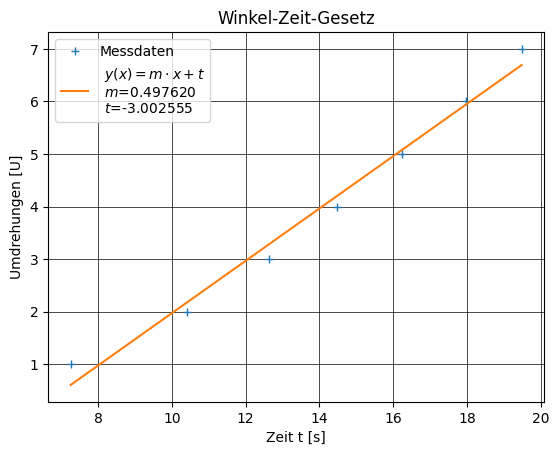

Errors: [0.0938530588091418, 0.13056664131027854, 0.5021619233425691, 0.11384741684476841, 0.22958081221007004, 0.4125577516046758, 0.2685687156162846]


In [3]:
import numpy as np 
import matplotlib.pyplot as plt
import scipy as sp
import sympy as sy





##nächstes mal in 2dim array
##1. Versuch "Winkel-Zeit-Gesetz"
v1n1=[7.34, 7.26, 7.20, 7.27, 7.20]
v1n2=[10.47, 10.40, 10.40, 10.33, 10.46]
v1n3=[12.75, 12.80, 12.82, 12.82, 12.61, 12.42, 12.30]
v1n4=[14.48, 14.45, 14.44, 14.52, 14.51]
v1n5=[16.28, 16.16, 16.27, 16.27 ]
v1n6=[17.90, 17.88, 18.04, 17.97, 18.13]
v1n7=[19.50, 19.41, 19.44, 19.50, 19.57]
turns=[1, 2, 3, 4, 5, 6, 7]
v1MF=0.15



##Mittelwerte
v1n1mean=(np.mean(v1n1))
v1n2mean=(np.mean(v1n2))
v1n3mean=(np.mean(v1n3))
v1n4mean=(np.mean(v1n4))
v1n5mean=(np.mean(v1n5))
v1n6mean=(np.mean(v1n6))
v1n7mean=(np.mean(v1n7))
##Array mit allem Mittelwerten:

meanraw=np.array([v1n1mean,v1n2mean, v1n3mean, v1n4mean, v1n5mean, v1n6mean, v1n7mean])
meanarray=[]##meanarray zum plotten
mean=[]##mean für tex
for i in range(len(meanraw)):
    mean.append(round(meanraw[i],6))
    meanarray.append((meanraw[i]))
print(f'mean: {mean}')



##Standartabweichung für jeden Array:
sigma=[]
sigma.append(np.std(v1n1, ddof=1)/np.sqrt((len(v1n1))))
sigma.append(np.std(v1n2, ddof=1)/np.sqrt((len(v1n2))))
sigma.append(np.std(v1n3, ddof=1)/np.sqrt((len(v1n3))))
sigma.append(np.std(v1n4, ddof=1)/np.sqrt((len(v1n4))))
sigma.append(np.std(v1n5, ddof=1)/np.sqrt((len(v1n5))))
sigma.append(np.std(v1n6, ddof=1)/np.sqrt((len(v1n6))))
sigma.append(np.std(v1n7, ddof=1)/np.sqrt((len(v1n7))))


    


##Achtung sigma wird gerunden(nicht mehr zum rechnen verwenden)
for i in range(len(sigma)):
    sigma[i]=round(sigma[i],4)

print(f'Sigma: {sigma}')


##Lineare Regression:
linreg=sp.stats.linregress(meanarray,turns)
print(linreg)
m=linreg.slope
t=linreg.intercept
x=np.linspace(min(meanarray), max(meanarray), 501)
y=m*x+t

##Plot:
reglabel=f' $y(x) = m \\cdot x + t$ \n $m$={m:.6f} \n $t$={t:.6f}'
plt.plot(meanarray, turns, linestyle='', marker='+', label='Messdaten')
plt.plot(x, y, label=reglabel)
plt.title('Winkel-Zeit-Gesetz')
plt.legend()
plt.xlabel('Zeit t [s]')
plt.ylabel('Umdrehungen [U]')
plt.grid(visible=True, color='black', linewidth=0.5)


plt.show()

##Fehlerrechnung:
errors=[]
ersrnd=[]
for i in range(7):
    errors.append(linreg.slope*mean[i]*sigma[i])
print(f'Errors: {errors}')




In [ ]:







J_S=1/12 * m_s *L_s**2
J_H=m_H*d_H**2/2

J=1/12 * m_s *L_s**2+m_H*d_H**2/2


=(m_z*g*r)/(1/12 * m_s *L_s**2+m_H*d_H**2/2)









In [1]:
import sympy as sy
import numpy as np

# Definieren der Symbole
pi=sy.pi

# Definiere die Symbole
t, m_z, g, r, m_S, L, m_H, d, n = sy.symbols('t m_z g r m_S L m_H d n', real=True, positive=True)
sigma_mz, sigma_g, sigma_r, sigma_mS, sigma_L, sigma_mH, sigma_d = sy.symbols('sigma_mz sigma_g sigma_r sigma_mS sigma_L sigma_mH sigma_d', real=True, positive=True)

# Die nach t aufgelöste Funktion
t_expr = sy.sqrt(4 * pi * n * ((1/12)*m_S*L**2 + (1/2)*m_H*d**2) / (m_z * g * r))

# Berechne die partiellen Ableitungen
partial_mz = sy.diff(t_expr, m_z)
partial_g = sy.diff(t_expr, g)
partial_r = sy.diff(t_expr, r)
partial_mS = sy.diff(t_expr, m_S)
partial_L = sy.diff(t_expr, L)
partial_mH = sy.diff(t_expr, m_H)
partial_d = sy.diff(t_expr, d)

# Gauß'sche Fehlerfortpflanzung
sigma_t_sqr = (sy.simplify(partial_mz)**2 * sigma_mz**2 +
               sy.simplify(partial_g)**2 * sigma_g**2 +
               sy.simplify(partial_r)**2 * sigma_r**2 +
               sy.simplify(partial_mS)**2 * sigma_mS**2 +
               sy.simplify(partial_L)**2 * sigma_L**2 +
               sy.simplify(partial_mH)**2 * sigma_mH**2 +
               sy.simplify(partial_d)**2 * sigma_d**2)

sigma_t_sqr = (sy.simplify(partial_mz)**2 * sigma_mz**2 +
               sy.simplify(partial_g)**2 * sigma_g**2 +
               sy.simplify(partial_r)**2 * sigma_r**2 +
               sy.simplify(partial_mS)**2 * sigma_mS**2 +
               sy.simplify(partial_L)**2 * sigma_L**2 +
               sy.simplify(partial_mH)**2 * sigma_mH**2 +
               sy.simplify(partial_d)**2 * sigma_d**2)
        
    
sigma_t = sy.sqrt(sigma_t_sqr)
sgt=sy.latex(sigma_t)
print(sgt)
print(sigma_t)

pi = np.pi

m_z = 25.5 * 10**-3
sigma_mz = 2 * 10**-4
m_s = m_S = 296.1 * 10**-3
sigms = sigma_mS = 5.0 * 10**-4
L_s = L = 92.00 * 10**-2
sigLs = sigma_L = 2.0 * 10**-3
m_H = m_H = 248.6 * 10**-3
sigmH = sigma_mH = 2.0 *10**-4
d_h = d = 32.90 *10**-2
sigdh = sigma_d = 1.0 *10**-3
g = 9.806
sigg = sigma_g = 0.002
r = 51 *10**-3
sigr = sigma_r = 0.2 *10**-3

deltatarray=[]
for i in range(6):
    n=i+1
    t=meanarray=[0]
    deltat=0.00694444444444444*pi*L**4*n*sigma_mS**2/(g*m_z*r*(0.166666666666667*L**2*m_S + d**2*m_H)) + 0.0277777777777778*pi*L**2*m_S**2*n*sigma_L**2/(g*m_z*r*(0.166666666666667*L**2*m_S + d**2*m_H)) + 0.25*pi*d**4*n*sigma_mH**2/(g*m_z*r*(0.166666666666667*L**2*m_S + d**2*m_H)) + pi*d**2*m_H**2*n*sigma_d**2/(g*m_z*r*(0.166666666666667*L**2*m_S + d**2*m_H)) + 0.25*pi*n*sigma_r**2*(0.166666666666667*L**2*m_S + d**2*m_H)/(g*m_z*r**3) + 0.25*pi*n*sigma_mz**2*(0.166666666666667*L**2*m_S + d**2*m_H)/(g*m_z**3*r) + 0.25*pi*n*sigma_g**2*(0.166666666666667*L**2*m_S + d**2*m_H)/(g**3*m_z*r)
    deltat=1.4142135623731*np.sqrt(deltat)
    deltatarray.append(round(deltat,6))
    
    
print(f'Das sind die Fehler: {deltatarray}')

1.4142135623731 \sqrt{\frac{0.00694444444444444 \pi L^{4} n \sigma_{mS}^{2}}{g m_{z} r \left(0.166666666666667 L^{2} m_{S} + d^{2} m_{H}\right)} + \frac{0.0277777777777778 \pi L^{2} m_{S}^{2} n \sigma_{L}^{2}}{g m_{z} r \left(0.166666666666667 L^{2} m_{S} + d^{2} m_{H}\right)} + \frac{0.25 \pi d^{4} n \sigma_{mH}^{2}}{g m_{z} r \left(0.166666666666667 L^{2} m_{S} + d^{2} m_{H}\right)} + \frac{\pi d^{2} m_{H}^{2} n \sigma_{d}^{2}}{g m_{z} r \left(0.166666666666667 L^{2} m_{S} + d^{2} m_{H}\right)} + \frac{0.25 \pi n \sigma_{r}^{2} \cdot \left(0.166666666666667 L^{2} m_{S} + d^{2} m_{H}\right)}{g m_{z} r^{3}} + \frac{0.25 \pi n \sigma_{mz}^{2} \cdot \left(0.166666666666667 L^{2} m_{S} + d^{2} m_{H}\right)}{g m_{z}^{3} r} + \frac{0.25 \pi n \sigma_{g}^{2} \cdot \left(0.166666666666667 L^{2} m_{S} + d^{2} m_{H}\right)}{g^{3} m_{z} r}}
1.4142135623731*sqrt(0.00694444444444444*pi*L**4*n*sigma_mS**2/(g*m_z*r*(0.166666666666667*L**2*m_S + d**2*m_H)) + 0.0277777777777778*pi*L**2*m_S**2*n*sigma_

In [2]:
## 2. Versuch Daten in Arrays


v2_small_timedata = [12.49, 12.40, 12.37, 12.41, 12.44] # Zeit in Sekunden
v2_medium_timedata = [8.81, 8.80, 8.73, 8.83, 8.79]
v2_big_timedata = [7.18, 7.12, 7.14, 7.14, 7.14, 7.14]



grav_acceleration = 9.806 # +/- Unsicherheit 0.002

height_over_sealevel = 520 ## in Meter

rod = 92 # in cm +/- Ungenauigkeit 0.2 cm




##das Trägheitsmoment ist noch zu erfassen

##alpha=(F*r)/J_v1

v2_small_mean_timedata = np.mean(v2_small_timedata)
v2_medium_mean_timedata = np.mean(v2_medium_timedata)
v2_big_mean_timedata = np.mean(v2_big_timedata)




In [3]:
## 3. Versuch Daten in Arrays n = 4

##Abstand d = 23 cm +/- 0.1 (klein) 

v3_small_timedata = [13.30, 13.00, 13.20, 13.28, 12,89] # d = 23.00 cm 
v3_medium_timedata = [17.94, 17.37, 18.05, 17.80, 18.07, 17.40] #d = 44.3 cm
v3_big_timedata = [23.16, 23.08, 23.07,22.96, 23.07] # d = 72.2

## Zeit Messfehler = 0.15 s

In [8]:
import numpy as np
import sympy as sy

## 1. Versuch Winkelbeschleunigung Berechnen


## Außerdem wurde noch die Winkelbeschleunigung (siehe Formel 5.2) für jeden Messwert und daraus dann jeweils der Mittelwert der Winkelbeschleunigung für jede
##Messreihe und die Standardabweichung der Mittelwerte der Winkelbeschleunigung berechnet. Die Standardabweichung der Mittelwerte wurde danach als Fehler der
##Winkelbeschleunigung angenommen.

t_n1 = [7.34, 7.26, 7.20, 7.27, 7.20]
t_n2 = [10.47, 10.40, 10.40, 10.33, 10.46]
t_n3 = [12.75, 12.80, 12.82, 12.82, 12.61, 12.42, 12.30]
t_n4 = [14.48, 14.45, 14.44, 14.52, 14.51]
t_n5 = [16.28, 16.16, 16.27, 16.27, 16.25]
t_n6 = [17.90, 17.88, 18.04, 17.97, 18.13]
t_n7 = [19.50, 19.41, 19.44, 19.50, 19.57]


##Formel: 
t_mean1=(np.mean(t_n1))
t_mean2=(np.mean(t_n2))
t_mean3=(np.mean(t_n3))
t_mean4=(np.mean(t_n4))
t_mean5=(np.mean(t_n5))
t_mean6=(np.mean(t_n6))
t_mean7=(np.mean(t_n7))

t_n_all = [t_n1, t_n2, t_n3, t_n4, t_n5, t_n6, t_n7]
t_mean_list = []

for i in range(len(t_n_all)):
    t_mean = np.mean(t_n_all[i])
    t_mean_list.append(t_mean)



print(f"Mittelwerte der Zeiten: {t_mean_list}")

std_list = []
n = len(t_n_all[i])

squared_diffs = [(x - t_mean)**2 for x in t_n_all[i]]
std = np.sqrt(sum(squared_diffs) / (n - 1))
std_list.append(std)

    
print(f"Die Standardabweichungen: {std_list}")
    

  ##  a = 4*np.pi*n/(t**2)

# Liste um die berechneten Werte von a zu speichern
a_list = []

# Schleife, um für jede durchschnittliche Zeit t den Wert a zu berechnen
for i in range(len(t_mean_list)):
    n = i + 1  # Da i von 0 startet und n mit 1 beginnen soll, addieren wir einfach 1 zu i
    t_mean = t_mean_list[i]
    a = 4 * np.pi * n / t_mean**2
    a_list.append(a)

# a_list enthält jetzt die berechneten Werte von a
print(f"Die Winkelbeschleunigungen: {a_list}")












Mittelwerte der Zeiten: [7.2540000000000004, 10.412, 12.645714285714286, 14.48, 16.246, 17.983999999999998, 19.483999999999998]
Die Standardabweichungen: [0.061886993787063034]
Die Winkelbeschleunigungen: [0.23881123883998345, 0.23183101722589014, 0.2357460302040236, 0.23973571118019849, 0.23806029671537657, 0.23312482687184427, 0.23171367340965535]


In [1]:
import sympy as sy
import numpy as np

# Variablen definieren
m_z, g, r, m_s, L_s, m_H, d_h = sy.symbols('m_z g r m_s L_s m_H d_h')

# Funktion definieren
a = (m_z * g * r) / (1/12 * m_s * L_s*2 + m_H * d_h*2 / 2)

# Varianzen der einzelnen Variablen (Annahme, Wert bitte anpassen)
sigma_mz, sigma_g, sigma_r, sigma_ms, sigma_Ls, sigma_mH, sigma_dh = \
    sy.symbols('sigma_mz sigma_g sigma_r sigma_ms sigma_Ls sigma_mH sigma_dh')

# Partielle Ableitungen der Funktion bezüglich jeder Variablen
da_dmz = sy.diff(a, m_z)
da_dg = sy.diff(a, g)
da_dr = sy.diff(a, r)
da_dms = sy.diff(a, m_s)
da_dLs = sy.diff(a, L_s)
da_dmH = sy.diff(a, m_H)
da_ddh = sy.diff(a, d_h)

# Fehlerfortpflanzung für jede Variable
sigma_a = sy.sqrt((da_dmz * sigma_mz)**2 +
                  (da_dg * sigma_g)**2 +
                  (da_dr * sigma_r)**2 +
                  (da_dms * sigma_ms)**2 +
                  (da_dLs * sigma_Ls)**2 +
                  (da_dmH * sigma_mH)**2 +
                  (da_ddh *sigma_dh)**2)

AUFGABE 2 ( NEUE VERSION; Autor: Malik)
DATUM: 06.05.2024


Nachricht: "Nach Besprechung neue Version für Aufgabe 2. Diesmal wurde nicht die Zeit und die Umdrehungen als Berechnungsfaktor genommen, sondern die Trägheitsmomente und das Drehmoment. "



Drehmoment für Radius 1 ist: 0.012752702999999997
Drehmoment für Radius 2 ist: 0.02750583
Drehmoment für Radius 3 ist: 0.042759063
Trägheitsmoment ist:0.034339276300000006
Die Winkelgeschwindigkeit für Radius 1 ist: 0.3713736681165874
Die Winkelgeschwindigkeit für Radius 2 ist: 0.801002029271071
Die Winkelgeschwindigkeit für Radius 3 ist: 1.2451940636850285
1/alpha : 2.692705718936606
Der Inhalt des Drehmoment-Arrays ist:[0.012752702999999997, 0.02750583, 0.042759063]
LinregressResult(slope=29.121172830308012, intercept=0.0, rvalue=1.0, pvalue=9.003163161571059e-11, stderr=0.0, intercept_stderr=0.0)


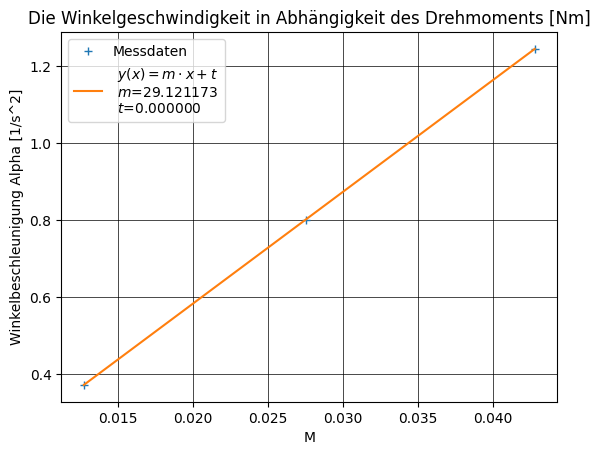

In [19]:
import sympy as sy
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp

#alpha = M/J

m_zug = 25.5 * 10**-3
m_stab = 296.1*10**-3
m_hantel = 248.6 * 10**-3
L_stab = 92.00 * 10**-2
d_gewichte_1 = 32.90 * 10**-2 # in m
g = 9.806
r_1 = 0.051
r_2 = 0.11
r_3 = 0.171

#Kraft des Gewichts berechnen
F = m_zug * g
#Drehmoment berechnen
M = F * r_1
M_2 = F * r_2
M_3 = F * r_3

print(f"Drehmoment für Radius 1 ist: {M}")
print(f"Drehmoment für Radius 2 ist: {M_2}")
print(f"Drehmoment für Radius 3 ist: {M_3}")

J = 1/12 * m_stab * L_stab**2 + 1/2 * m_hantel * d_gewichte_1**2
print(f"Trägheitsmoment ist:{J}")

alpha = M/J
alpha_2 = M_2/J
alpha_3 = M_3/J

print(f"Die Winkelgeschwindigkeit für Radius 1 ist: {alpha}")
print(f"Die Winkelgeschwindigkeit für Radius 2 ist: {alpha_2}")
print(f"Die Winkelgeschwindigkeit für Radius 3 ist: {alpha_3}")

alpha_inversed = 1/alpha

print(f"1/alpha : {alpha_inversed}")

#Zum plotten Werte in Arrays legen:

momentum_array = []
momentum_array = [M, M_2, M_3]

alpha_array = []
alpha_array = [alpha, alpha_2, alpha_3]

print(f"Der Inhalt des Drehmoment-Arrays ist:{momentum_array}")

# Lineare Regression

linreg=sp.stats.linregress(momentum_array,alpha_array)
print(linreg)
m=linreg.slope
t=linreg.intercept
x=np.linspace(min(momentum_array), max(momentum_array), 501)
y=m*x+t



#Plot wird hier durchgeführt
reglabel=f' $y(x) = m \\cdot x + t$ \n $m$={m:.6f} \n $t$={t:.6f}'
plt.plot(momentum_array, alpha_array, linestyle='', marker='+', label='Messdaten')
plt.plot(x, y, label=reglabel)
plt.title('Die Winkelgeschwindigkeit in Abhängigkeit des Drehmoments [Nm]')
plt.legend()
plt.xlabel('M')
plt.ylabel('Winkelbeschleunigung Alpha [1/s^2]')
plt.grid(visible=True, color='black', linewidth=0.5)


plt.show()



AUFGABE 3 ( NEUE VERSION; Autor: Malik)
DATUM: 06.05.2024


Nachricht: "Hier wird als nächstes Aufgabe 3 behandelt, diesmal mit Trägheitsmoment und Drehmoment als Berechnungsfaktor, mit dem Ziel den Graphen zu stabilisieren und die Berechnungen korrekt durchzuführen "

In [ ]:
import sympy as sy
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp

#alpha = M/J

m_zug = 25.5 * 10**-3
m_stab = 296.1*10**-3
m_hantel = 248.6 * 10**-3
L_stab = 92.00 * 10**-2
d_gewichte_1 = 32.90 * 10**-2 # in m
d_gewichte_2 = # in m
d_gewichte_3 = # in m
g = 9.806
r_1 = 0.051


#Kraft des Gewichts berechnen
F = m_zug * g
#Drehmoment berechnen
M = F * r_1

print(f"Drehmoment für Radius 1 ist: {M}")

J = 1/12 * m_stab * L_stab**2 + 1/2 * m_hantel * d_gewichte_1**2
J_2 = 1/12 * m_stab * L_stab**2 + 1/2 * m_hantel * d_gewichte_2**2
J_3 = 1/12 * m_stab * L_stab**2 + 1/2 * m_hantel * d_gewichte_3**2

print(f"Trägheitsmoment für Hantelabstand 1 ist:{J}")
print(f"Trägheitsmoment für Hantelabstand 2 ist:{J_2}")
print(f"Trägheitsmoment für Hantelabstand 3 ist:{J_3}")

alpha = M/J
alpha_2 = M/J_2
alpha_3 = M/J_3

print(f"Die Winkelgeschwindigkeit für Hantelabstand 1 ist: {alpha}")
print(f"Die Winkelgeschwindigkeit für Hantelabstand 2 ist: {alpha_2}")
print(f"Die Winkelgeschwindigkeit für Hantelabstand 3 ist: {alpha_3}")

# Hantelabstand quadrieren zum plotten
d_squared = d_gewichte_1**2
d_squared_2 = d_gewichte_2**2
d_squared_3 = d_gewichte_3**2

# Alpha inversed zum plotten
alpha_inversed = 1/alpha
alpha_inversed_2 = 1/alpha_2
alpha_inversed_3 = 1/alpha_3

#Werte in Arrays einfügen

alpha_inversed_array = []
alpha_inversed_array = [alpha_inversed, alpha_inversed_2, alpha_inversed_3]

d_squared_array = []
d_squared_array = [d_squared, d_squared_2, d_squared_3]

print(f"1/alpha Werte : {alpha_inversed_array}")
print(f"d^2 Werte :{d_squared_array}")